In [1]:
import sys
sys.path.append('../Modules/')
import Helper_function
import Constants as const
import Utils

In [2]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
%matplotlib inline
     

In [3]:
data_file = '../Data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
extension = 'csv'


data = Helper_function.Data()
df_raw = data.load_data(data_file, extension)
df_raw.head(10)

Data object initiated


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df_raw.shape

(7043, 21)

In [5]:
# feature exploration
df_raw.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# Checking missing / NULL values

df_raw.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [7]:
# Duplicate value check

df_raw.duplicated().any()

False

In [8]:
# Exploring data types of each feature

df_raw.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We need to rename columns into proper format and need to transform columns like Partner, Dependents and so on to similar format for furture analysis.

Also, need to change data type of TotalCharges to float.

Data transformation & Renaming

Here, we are going to rename some columns as well as modifying records with proper format for further analysis.

In [10]:
df_cal = Helper_function.data_transformation_renaming(df_raw)

df_cal.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,...,StreamingTV,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,0,One year,0,Mailed check,56.95,1889.50,0,1,1
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,0


In [11]:
cat_cols = ["Gender","Partner","Dependents","SeniorCitizen","PhoneService","MultipleLines"
                    ,"InternetServiceType","OnlineSecurity","OnlineBackup","DeviceProtection"
                    ,"TechSupport","StreamingTV","StreamingMovies","IsContracted"
                    ,"ContractType","PaperlessBilling","PaymentMethod"]


num_cols = ["Tenure","MonthlyCharges","TotalCharges"]

target_col = 'Churn'

# spliting categorical columns into Nominal and Binary columns

nominal_cols = ['Gender','InternetServiceType','PaymentMethod','ContractType']

binary_cols = ['SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity'
               ,'OnlineBackup' ,'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies'
               ,'PaperlessBilling','InternetService', 'IsContracted']

In [12]:
df_cal[cat_cols].describe(include='all')

,Gender,Partner,Dependents,SeniorCitizen,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,IsContracted,ContractType,PaperlessBilling,PaymentMethod
count,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043.000000,7043
unique,2,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,4
top,Male,NaN,NaN,NaN,NaN,NaN,Fiber optic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,NaN,Electronic check
freq,3555,NaN,NaN,NaN,NaN,NaN,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3875,NaN,2365
mean,NaN,0.483033,0.299588,0.162147,0.903166,0.421837,NaN,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.449808,NaN,0.592219,NaN
std,NaN,0.499748,0.458110,0.368612,0.295752,0.493888,NaN,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.497510,NaN,0.491457,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN
25%,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN
50%,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN
75%,NaN,1.000000,1.000000,0.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN


In [13]:
df_cal[num_cols].describe()

,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


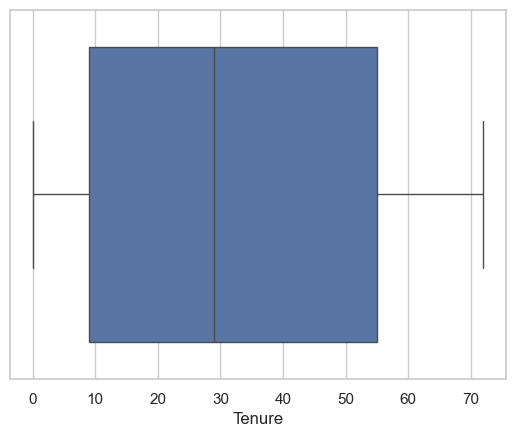

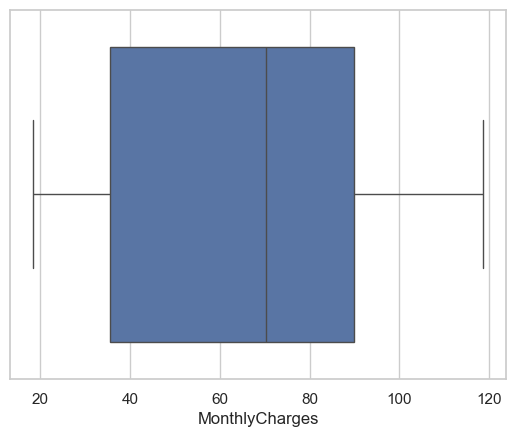

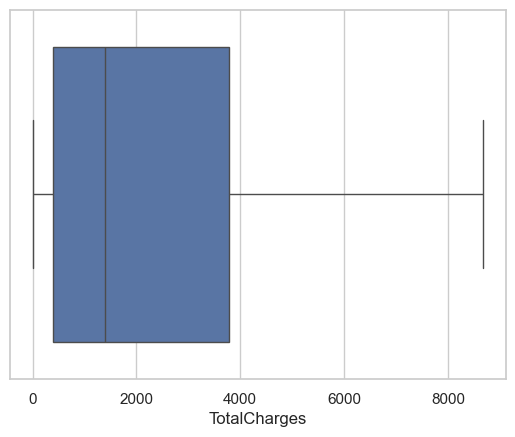

In [14]:
for i in num_cols:
    Helper_function.Outlier_boxplot(df_cal,i)

Box plot graphs shows that none of the numerical columns have outliers.



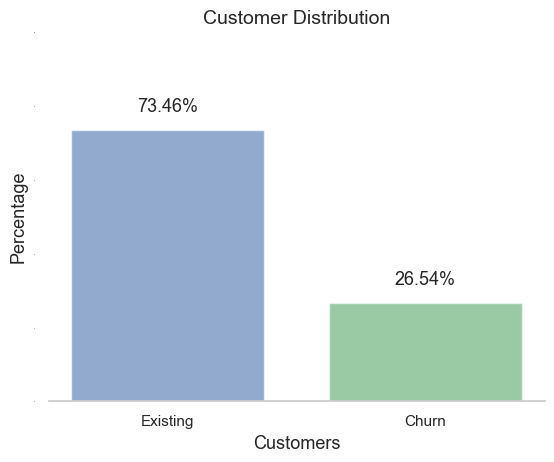

Churn
0    0.73463
1    0.26537
Name: count, dtype: float64


In [16]:
#Claculate the  churn rate
Churn_rate = df_cal['Churn'].value_counts() / df_cal.shape[0]
Helper_function.generate_bar_graph(Churn_rate.index.map({0:'Existing',1:"Churn"})
                   , Churn_rate.values
                   , 'Customers'
                   , 'Percentage'
                   , 'Customer Distribution')

print(Churn_rate)

Telecom company's churn rate is around 26%, Meaning around 26% of the subscribers from total left the company during given interval.

#Exploratory Data Analysis (EDA)

In [19]:
#Distribution of categorical and binary variables

C:\Users\Hp\OneDrive\Desktop\SAGAR\Projects\EDA\EDA_Projects\Telecom customer churn\Notebooks\../Modules\Helper_function.py:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plt_cat = sns.catplot(x=feature
C:\Users\Hp\OneDrive\Desktop\SAGAR\Projects\EDA\EDA_Projects\Telecom customer churn\Notebooks\../Modules\Helper_function.py:141: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  plt_cat = sns.catplot(x=feature
C:\Users\Hp\OneDrive\Desktop\SAGAR\Projects\EDA\EDA_Projects\Telecom customer churn\Notebooks\../Modules\Helper_function.py:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plt_cat = sns.catplot(x=feature
C:\Users\Hp\OneDrive\Desktop\SAGAR\Projects\EDA\EDA

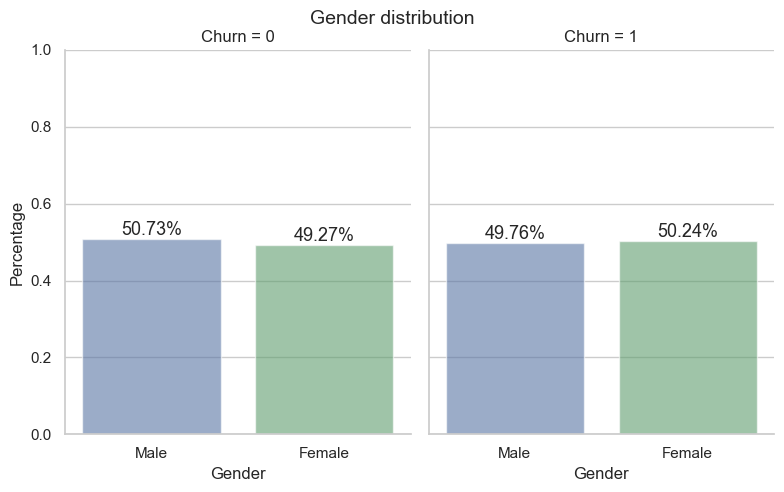

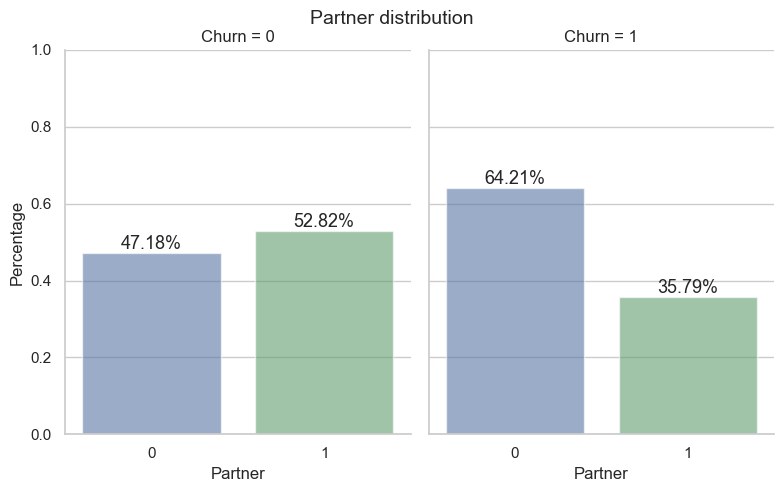

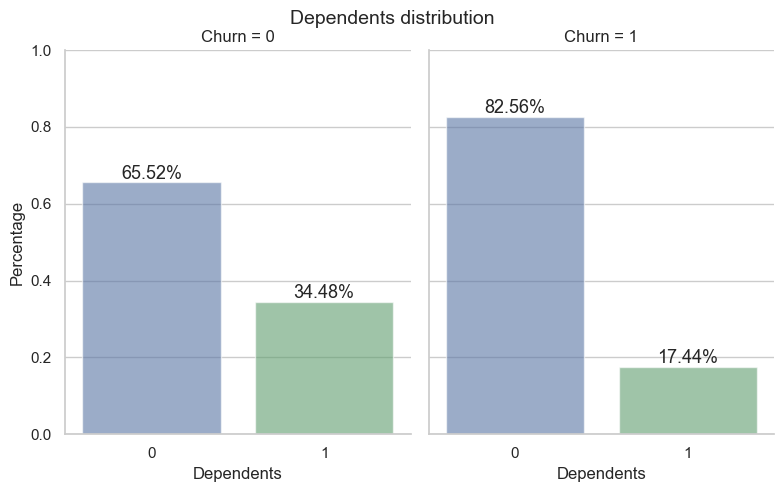

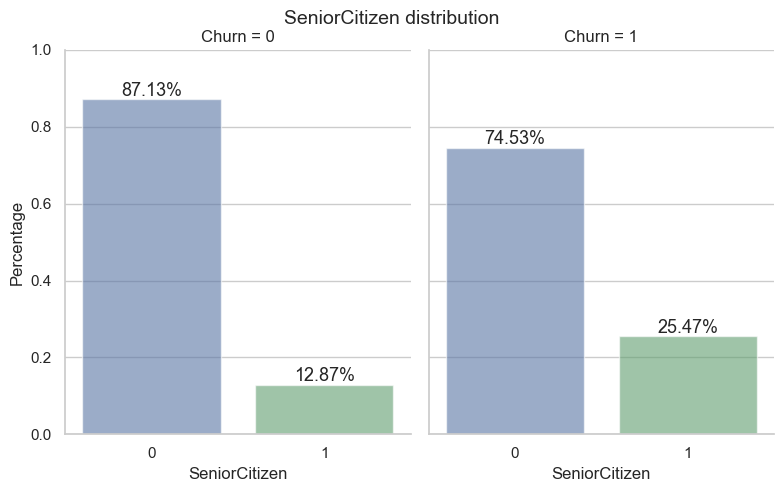

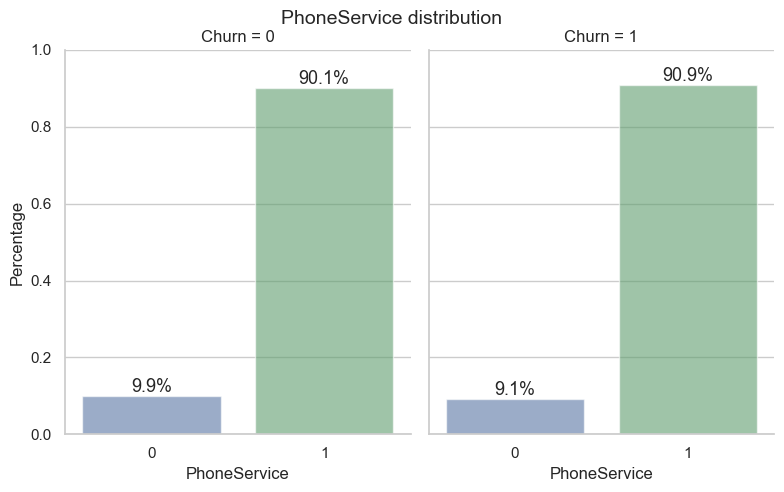

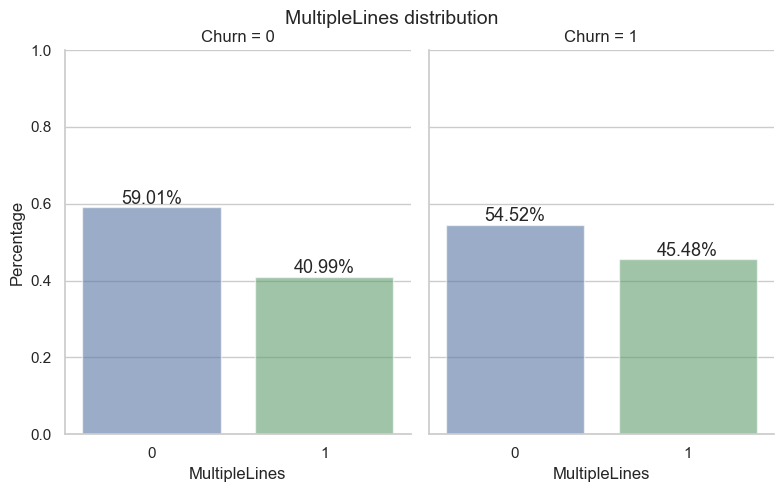

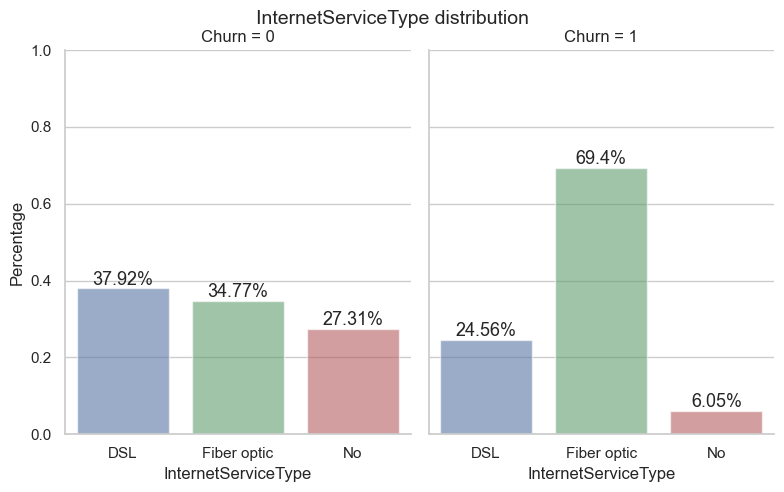

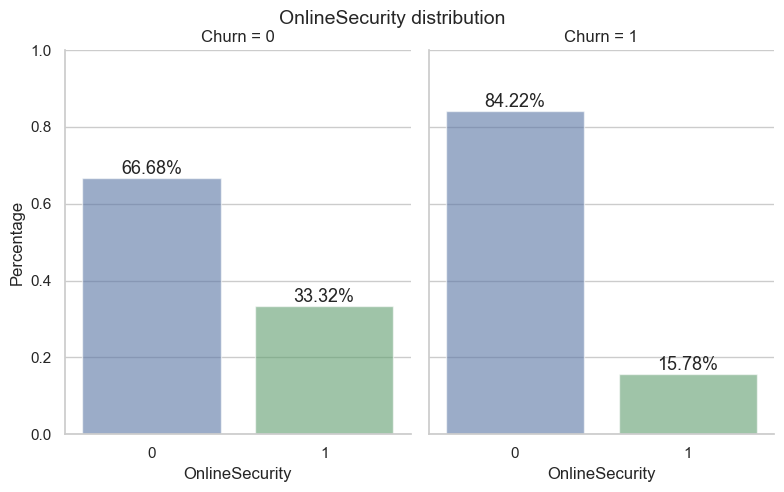

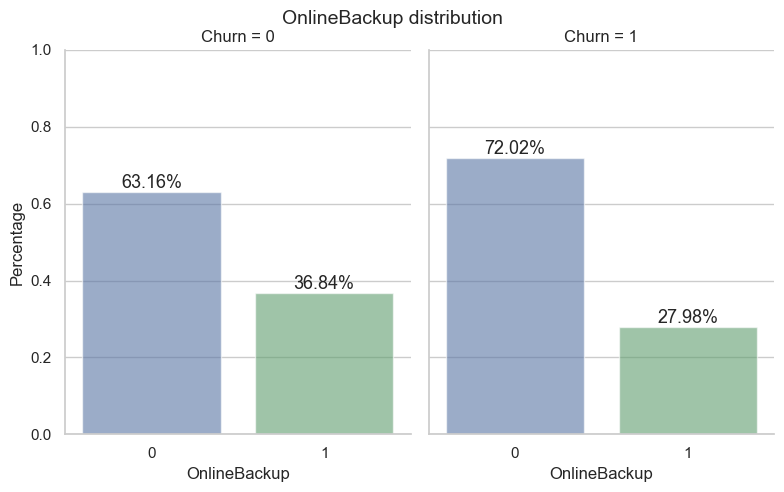

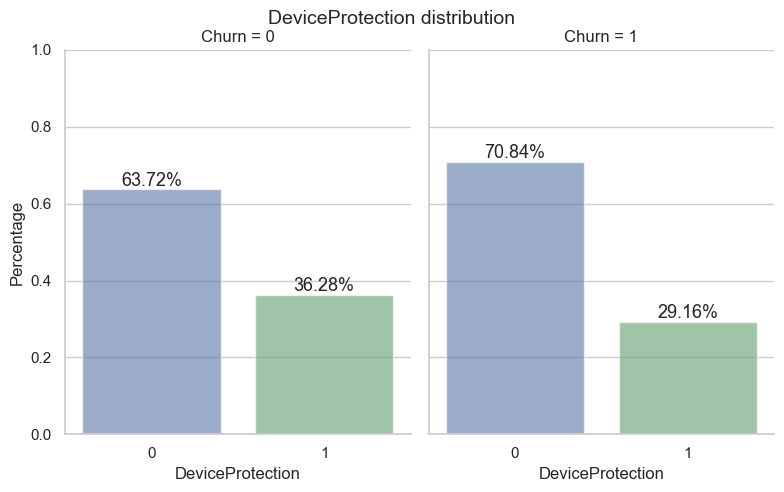

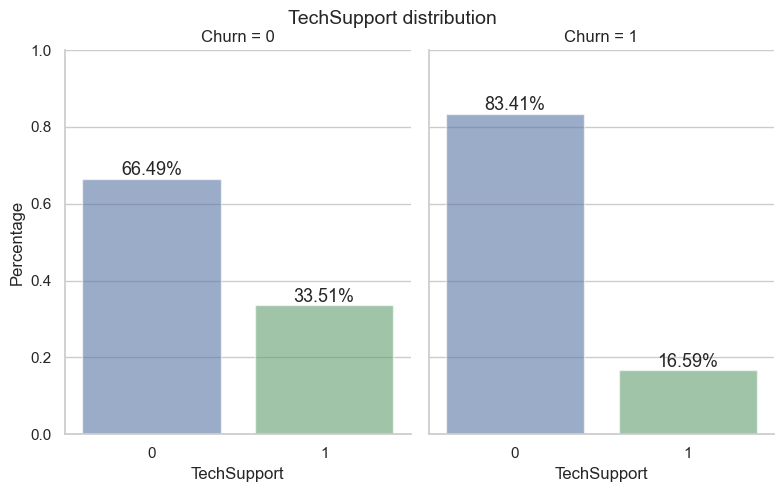

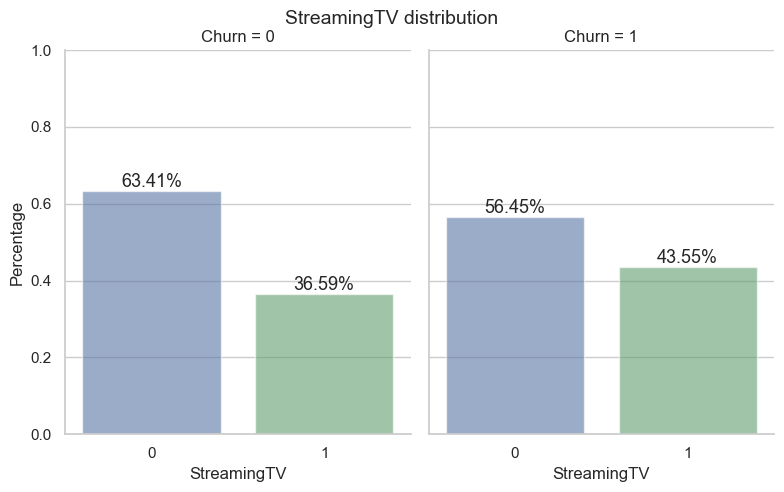

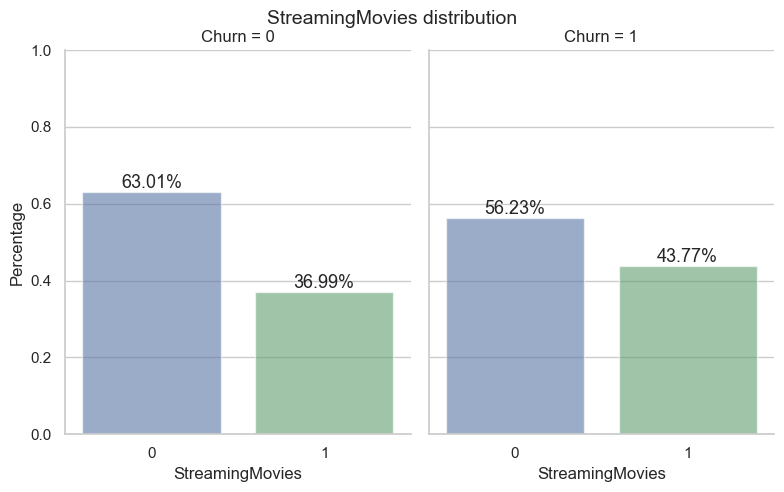

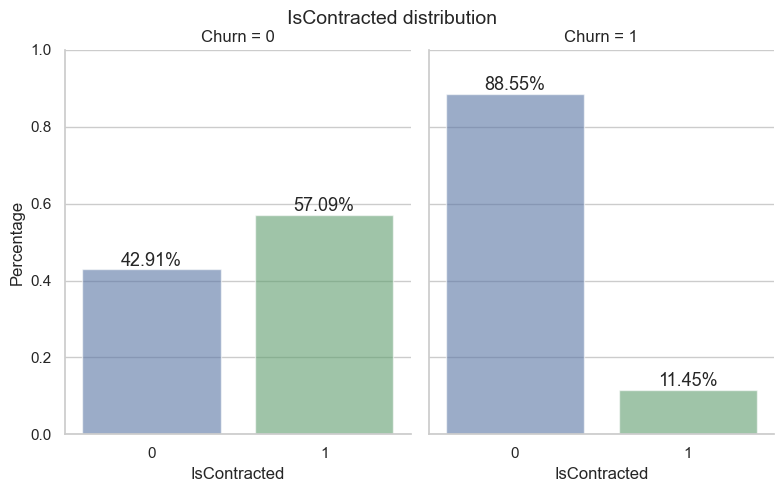

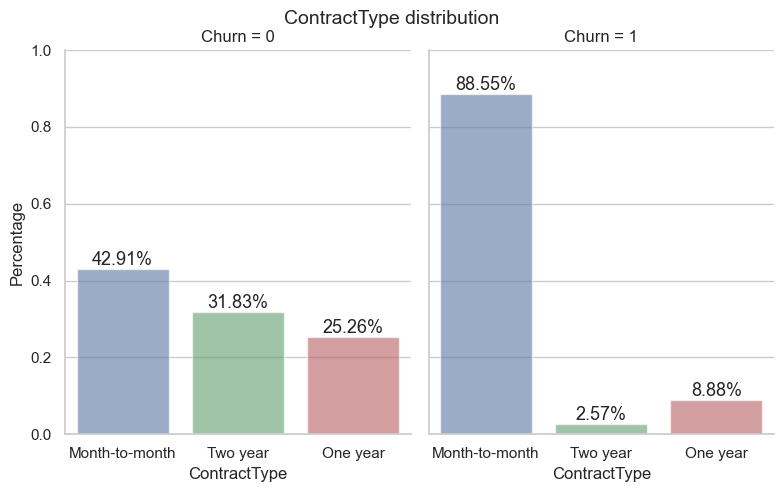

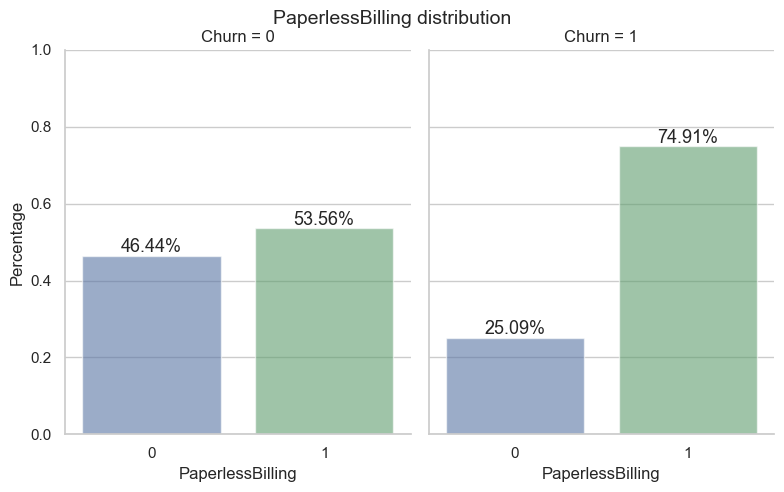

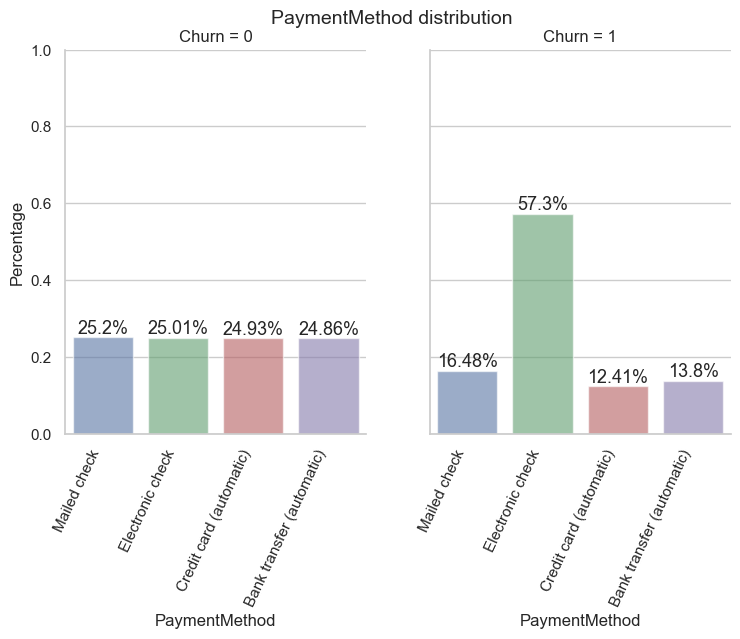

In [20]:
churn_summary = df_cal.groupby('Churn')
Helper_function.categorical_var_churn_dist(churn_summary, cat_cols,'Churn')

In [21]:
#Distribution of Tenure, Monthly Charges and Total Charges
print(churn_summary[['Tenure','MonthlyCharges','TotalCharges']].mean())

          Tenure  MonthlyCharges  TotalCharges
Churn                                         
0      37.569965       61.265124   2549.911442
1      17.979133       74.441332   1531.796094


C:\Users\Hp\OneDrive\Desktop\SAGAR\Projects\EDA\EDA_Projects\Telecom customer churn\Notebooks\../Modules\Helper_function.py:169: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_cal[feature]
C:\Users\Hp\OneDrive\Desktop\SAGAR\Projects\EDA\EDA_Projects\Telecom customer churn\Notebooks\../Modules\Helper_function.py:177: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_cal.loc[(df_cal['Churn']==1),feature]
C:\Users\Hp\OneDrive\Desktop\SAGAR\Projects\EDA\EDA_Projects\Telecom customer churn\Notebooks\../Modules\Helper_function.py:182: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_cal.loc[(df_cal['Churn']==0)

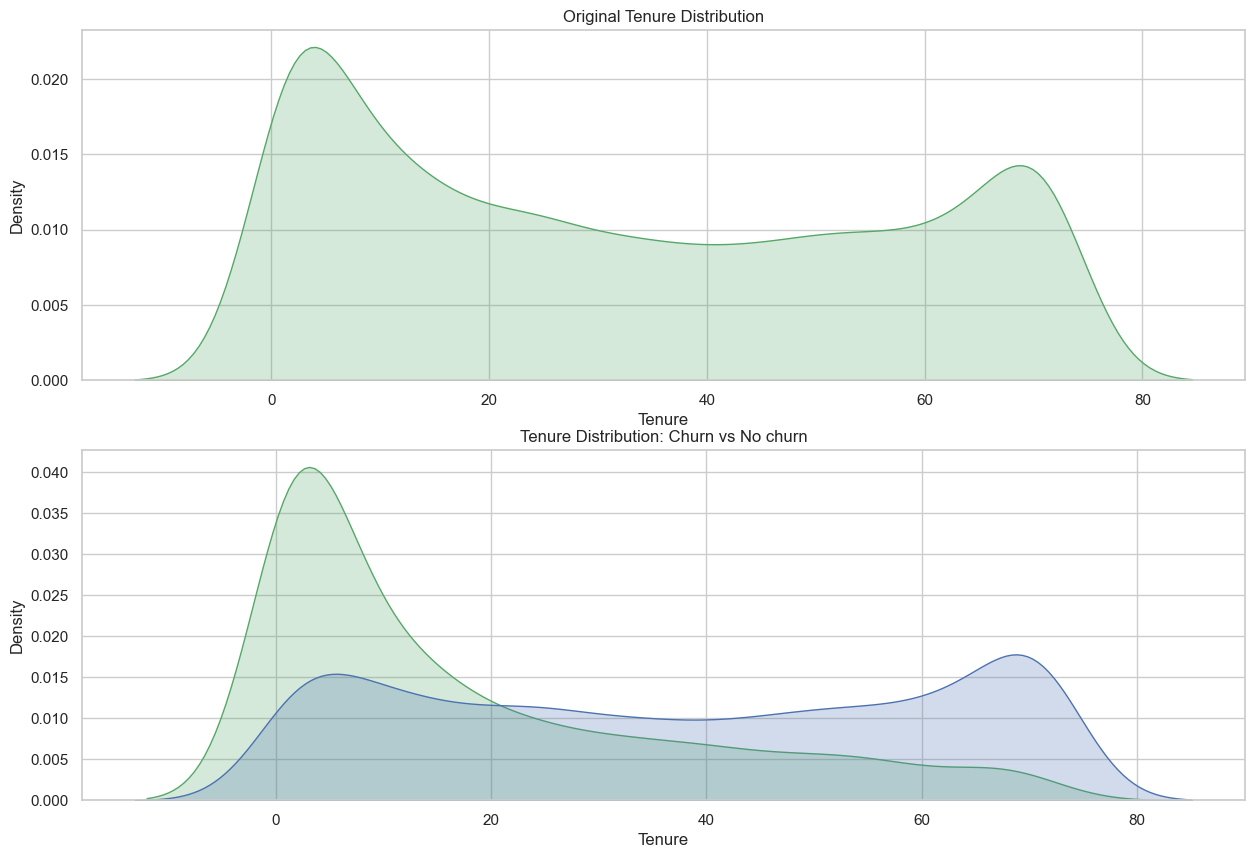

In [22]:
#Tenure vs Churn Distribution

Helper_function.numerical_distribution(df_cal,'Tenure')

C:\Users\Hp\OneDrive\Desktop\SAGAR\Projects\EDA\EDA_Projects\Telecom customer churn\Notebooks\../Modules\Helper_function.py:169: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_cal[feature]
C:\Users\Hp\OneDrive\Desktop\SAGAR\Projects\EDA\EDA_Projects\Telecom customer churn\Notebooks\../Modules\Helper_function.py:177: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_cal.loc[(df_cal['Churn']==1),feature]
C:\Users\Hp\OneDrive\Desktop\SAGAR\Projects\EDA\EDA_Projects\Telecom customer churn\Notebooks\../Modules\Helper_function.py:182: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_cal.loc[(df_cal['Churn']==0)

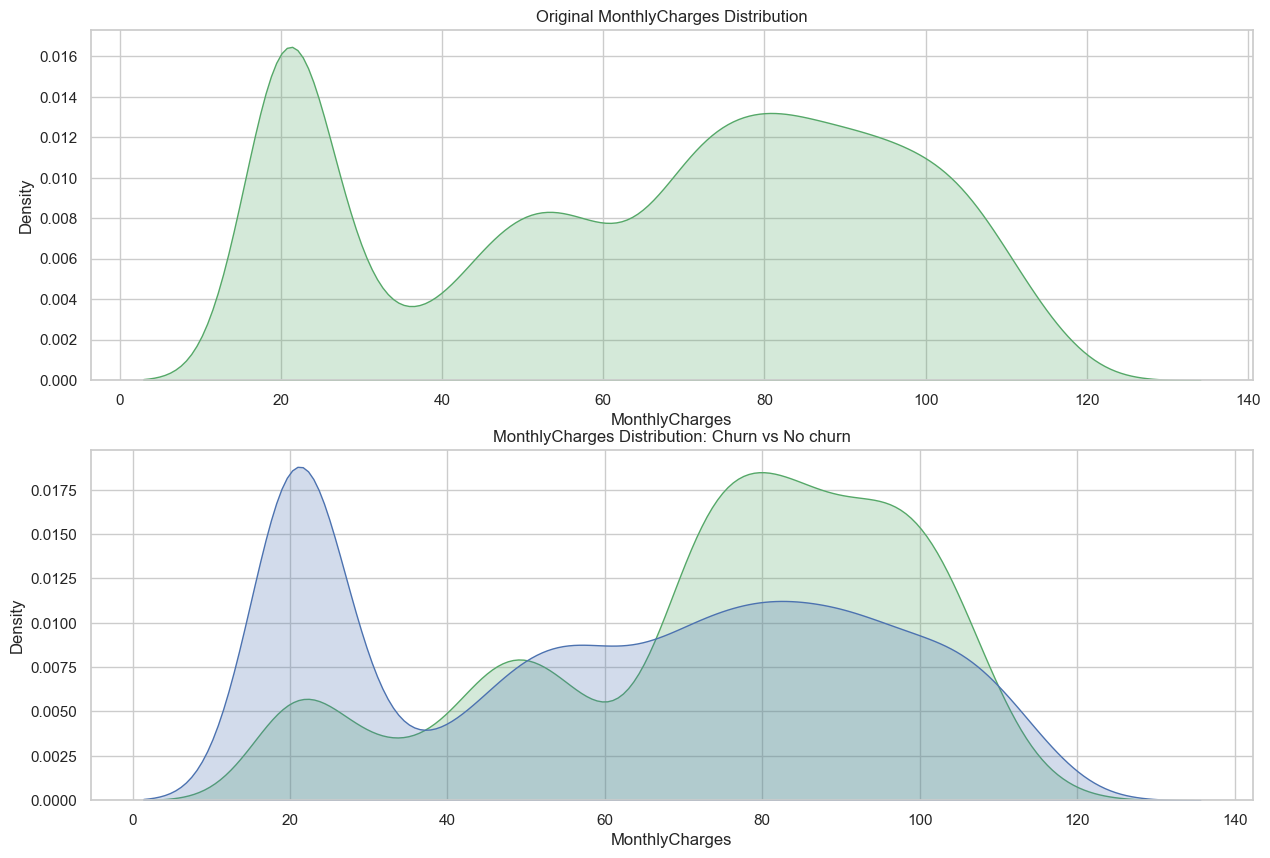

In [23]:
#MonthlyCharges vs Churn Distribution

Helper_function.numerical_distribution(df_cal,'MonthlyCharges')

C:\Users\Hp\OneDrive\Desktop\SAGAR\Projects\EDA\EDA_Projects\Telecom customer churn\Notebooks\../Modules\Helper_function.py:169: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_cal[feature]
C:\Users\Hp\OneDrive\Desktop\SAGAR\Projects\EDA\EDA_Projects\Telecom customer churn\Notebooks\../Modules\Helper_function.py:177: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_cal.loc[(df_cal['Churn']==1),feature]
C:\Users\Hp\OneDrive\Desktop\SAGAR\Projects\EDA\EDA_Projects\Telecom customer churn\Notebooks\../Modules\Helper_function.py:182: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_cal.loc[(df_cal['Churn']==0)

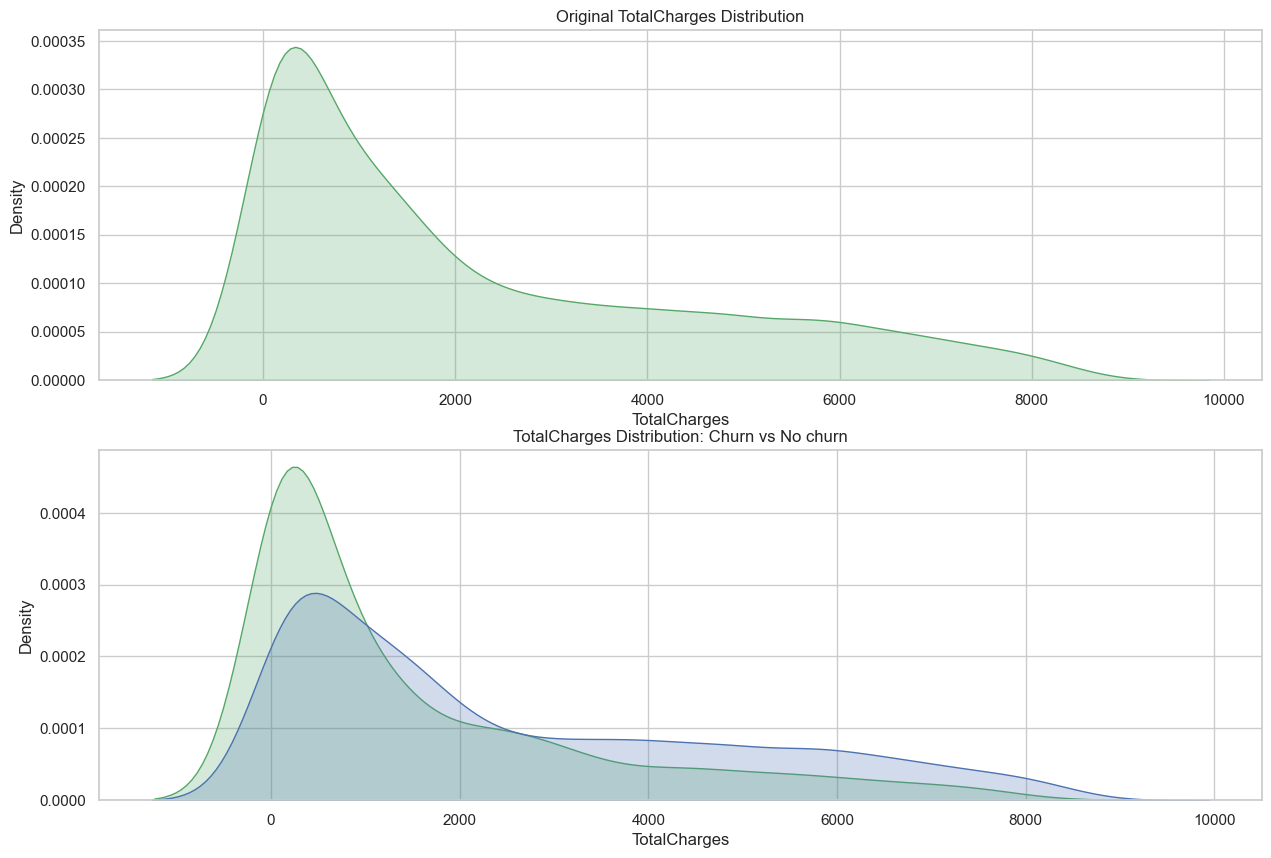

In [24]:
#TotalCharges vs Churn Distribution

Helper_function.numerical_distribution(df_cal, 'TotalCharges')

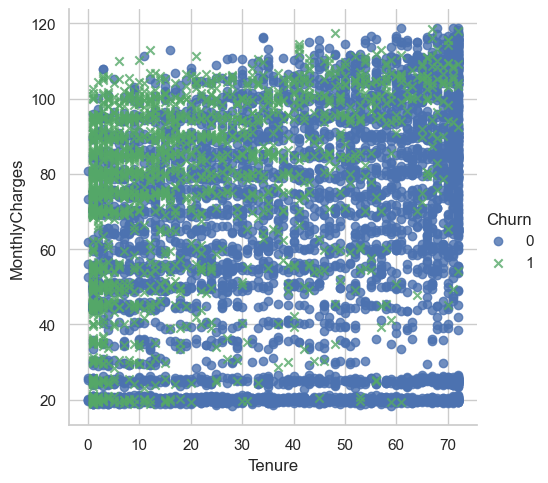

In [25]:
#Let's check is there any relationship between Tenure and MonthlyCharges.


sns.lmplot(x='Tenure'
           ,y='MonthlyCharges'
           ,data=df_cal
           ,hue='Churn'
            ,fit_reg=False
            ,markers=["o", "x"]
            ,palette= const.plotColor)
plt.show()

From the analysis, there are some clusters based on Tenure and Monthly Charges.

In [27]:
#Let's apply K-means cluster algorithm to see clusters. Before passing data to K-means algo, need to normalize Tenure and Monthly Charges.


# normalized tenure and monthlycharges

df_cal['Tenure_norm'] = Helper_function.normalize_feature(df_cal[['Tenure']])
df_cal['MonthlyCharges_norm'] = Helper_function.normalize_feature(df_cal[['MonthlyCharges']])
df_cal.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,...,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted,Tenure_norm,MonthlyCharges_norm
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,-1.277445,-1.160323
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,One year,0,Mailed check,56.95,1889.50,0,1,1,0.066327,-0.259629
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,-1.236724,-0.362660
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1,0.514251,-0.746535
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,Month-to-month,1,Electronic check,70.70,151.65,1,1,0,-1.236724,0.197365


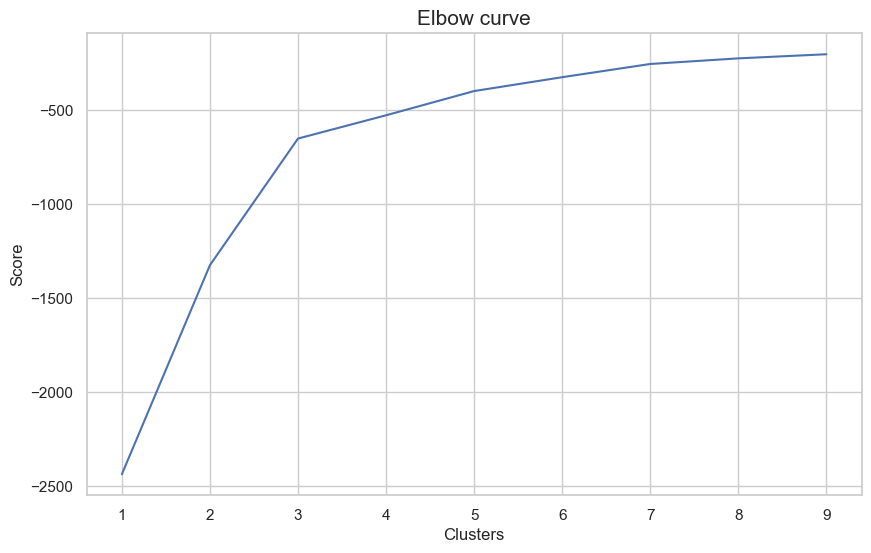

In [28]:
# checking number of clusters

Helper_function.create_elbow_curve(df_cal[df_cal.Churn==1][['Tenure_norm','MonthlyCharges_norm']])

From Elbow curve, 3 seems most efficient.

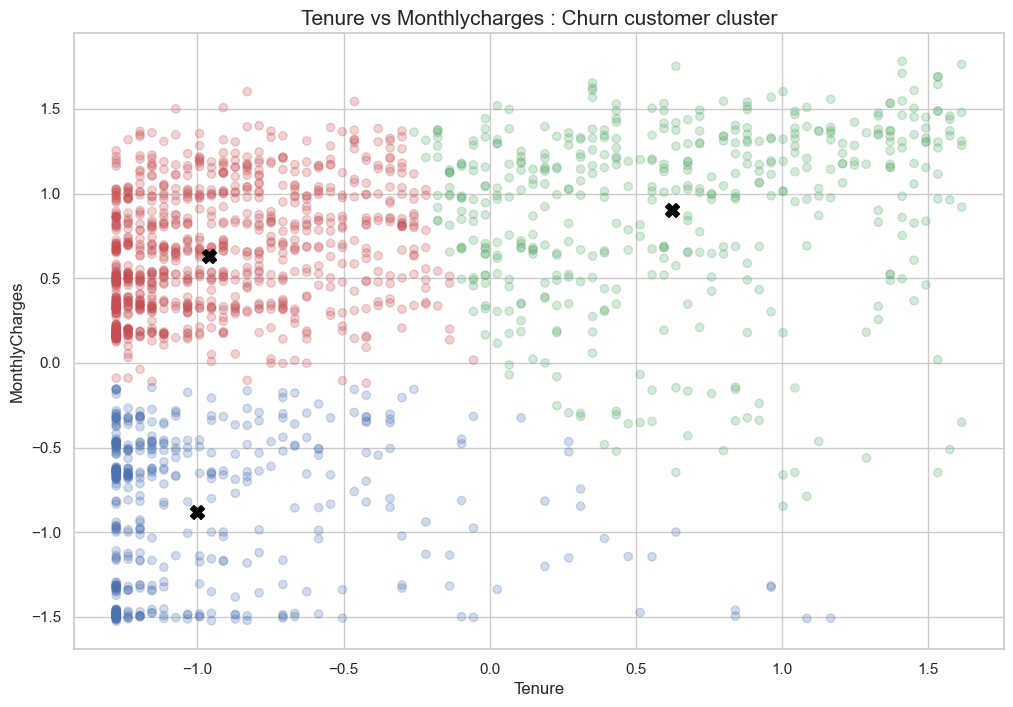

array([-1,  0,  2,  1], dtype=int64)

In [30]:
df_cal['Cluster'] = -1 # by default set Cluster to -1
df_cal.loc[(df_cal.Churn==1),'Cluster'] = Helper_function.create_kmeans_cluster_graph(df_cal
                            ,df_cal[df_cal.Churn==1][['Tenure_norm','MonthlyCharges_norm']]
                            ,3
                           ,'Tenure'
                           ,'MonthlyCharges'
                           ,"Tenure vs Monthlycharges : Churn customer cluster")

df_cal['Cluster'].unique()

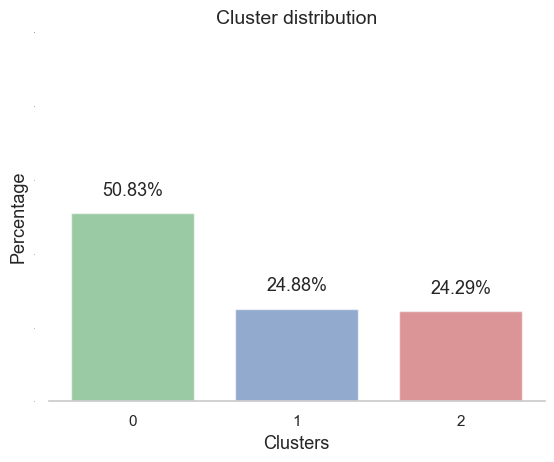

In [31]:
# Distribution of clusters
Helper_function.generate_bar_graph( x= [0,1,2]
                   , y = df_cal[df_cal['Churn']==1].Cluster.value_counts(normalize=True).values
                   , x_title = 'Clusters'
                   , y_title = 'Percentage'
                   , chart_title = 'Cluster distribution'
                  , color = ['g','b','r'])

Based on K-means cluster graph, we can see that there are three groups.

Low Tenure and High Monthly Charges (Green cluster)
High Tenure and High Monthly Charges (Red cluster)
Low Tenure and Low Monthly Charges (Blue cluster)
And From distribution graph shows that around 50% of the customers belong to cluster Low Tenure and High Monthly Charges.

Let's check there average Tenure and Monthly Charges.

In [33]:

df_cluster_gp = df_cal[df_cal['Churn']==1].groupby('Cluster')
print(df_cluster_gp[['Tenure','MonthlyCharges']].mean())

            Tenure  MonthlyCharges
Cluster                           
0         7.808602       38.329140
1        47.592511       91.855837
2         8.805263       83.795000


In [34]:
#Data Preprocessing

df_model = Helper_function.data_transformation_renaming(df_raw)
df_model.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,...,StreamingTV,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,0,One year,0,Mailed check,56.95,1889.50,0,1,1
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,0


In [35]:
df_model_feature ,df_model_target = Helper_function.create_model_df(df_model
                                                    , cat_cols
                                                    , nominal_cols
                                                    , binary_cols
                                                    , num_cols
                                                    , [target_col])

x_train, x_test, y_train, y_test = Helper_function.train_test_df(df_model_feature
                                                 , df_model_target
                                                 , test_size = 0.2)


print("----------------------------")
print("Original features shape, ", df_model_feature.shape)
print("Original target shape, ", df_model_target.shape)
print("x train shape, ", x_train.shape)
print("y train shape, ", y_train.shape)
print("x test shape, ", x_test.shape)
print("y test shape, ", y_test.shape)
print("----------------------------")

----------------------------
Original features shape,  (7043, 28)
Original target shape,  (7043,)
x train shape,  (5634, 28)
y train shape,  (5634,)
x test shape,  (1409, 28)
y test shape,  (1409,)
----------------------------


C:\Users\Hp\AppData\Local\Temp\ipykernel_7732\3459972154.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  Churn_rate = pd.value_counts(y_train) / len(y_train)


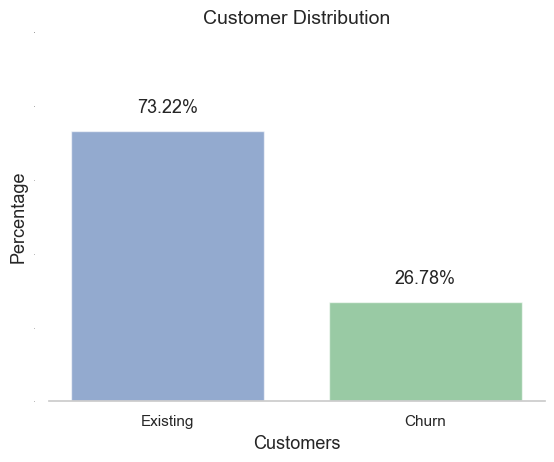

In [36]:
# After sampling distribution in train dataset

Churn_rate = pd.value_counts(y_train) / len(y_train)
Helper_function.generate_bar_graph(Churn_rate.index.map({0:'Existing',1:"Churn"})
                   , Churn_rate.values
                   , 'Customers'
                   , 'Percentage'
                   , 'Customer Distribution')
     

In [37]:
from imblearn.over_sampling import SMOTE

# Resample the train data

# Upsampling using SMOTE
sm = SMOTE(random_state=const.random_state, sampling_strategy=1.0)  # Set sampling_strategy to 1.0 for equal class distribution
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)  # Use fit_resample instead of fit_sample

print("----------------------------")
print("Original x train shape: ", x_train.shape)
print("Resampled x train shape: ", x_train_sm.shape)
print("----------------------------")


----------------------------
Original x train shape:  (5634, 28)
Resampled x train shape:  (8250, 28)
----------------------------


C:\Users\Hp\AppData\Local\Temp\ipykernel_7732\4216541539.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  Churn_rate = pd.value_counts(y_train_sm) / len(y_train_sm)


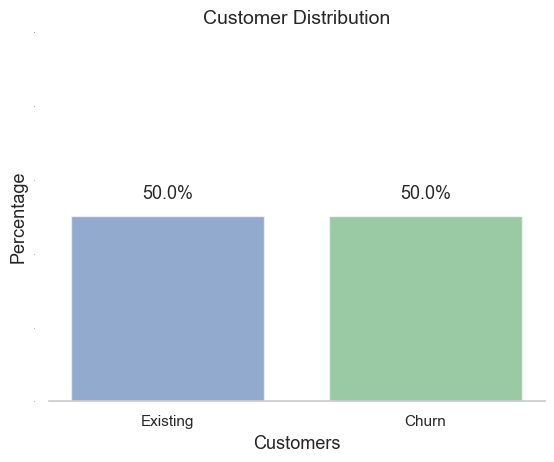

In [38]:
# After sampling distribution in train dataset

Churn_rate = pd.value_counts(y_train_sm) / len(y_train_sm)
Helper_function.generate_bar_graph(Churn_rate.index.map({0:'Existing',1:"Churn"})
                   , Churn_rate.values
                   , 'Customers'
                   , 'Percentage'
                   , 'Customer Distribution')

In [39]:
clsLR = LogisticRegression(random_state = const.random_state)
clsRF = RandomForestClassifier(random_state = const.random_state)
#clsXGB = GradientBoostingClassifier(random_state = random_state)

clsModels = [clsLR, clsRF]
clsModelsNm = ["Logistic Regression","Random Forest"]
clsSample = [[x_train, y_train,'Original data']
            , [x_train_sm, y_train_sm,'Resampling data']]

scoreMatrix = ['accuracy','precision','recall','f1','neg_log_loss']

clsScore={}
clsScore = Helper_function.cross_validation_score(clsModels, clsModelsNm, clsSample, scoreMatrix)

Logistic Regression
************************************************
Original data
accuracy  score: 0.7990797492832951
precision  score: 0.6488099410421871
recall  score: 0.5441024399903192
f1  score: 0.5915983917280505
neg_log_loss  score: -0.4212376814953408
************************************************
Resampling data
accuracy  score: 0.8093333333333333
precision  score: 0.7971174111887745
recall  score: 0.8278787878787879
f1  score: 0.8092655540198932
neg_log_loss  score: -0.41283167668181375
Random Forest
************************************************
Original data
accuracy  score: 0.7893188505613071
precision  score: 0.6337210836920658
recall  score: 0.5023673846560032
f1  score: 0.5597255234358391
neg_log_loss  score: -0.5072236825840003
************************************************
Resampling data
accuracy  score: 0.8475151515151514
precision  score: 0.8301379752166843
recall  score: 0.8727272727272727
f1  score: 0.8494278856149036
neg_log_loss  score: -0.40327337597321

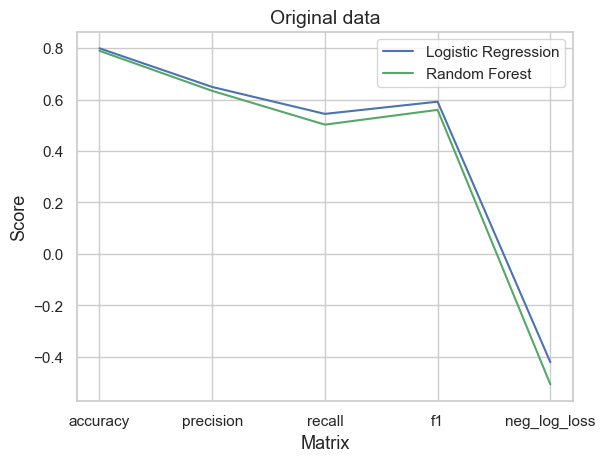

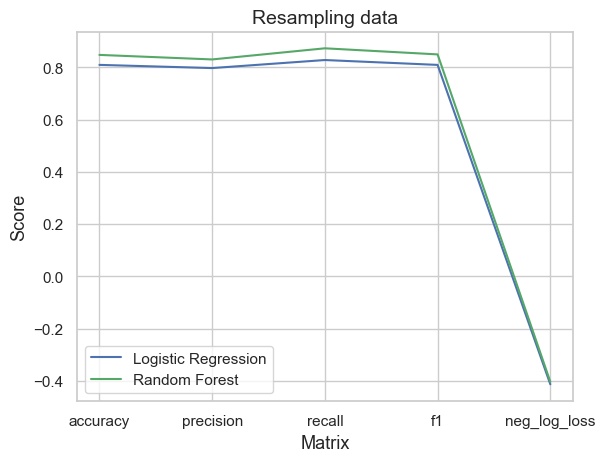

In [40]:
Helper_function.generate_cross_valid_graph(clsScore, scoreMatrix)

Parameter Tunning

In [44]:
clsParams = {'Logistic Regression':{'C':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
                                   ,'penalty':['l1','l2']}
            , 'Random Forest': {'max_depth':[3,5,7,10,15,20]
                               ,'n_estimators':[100,150,200,250]
                              ,'max_features':['auto',0.7,0.2]
                              ,'min_samples_leaf':[1,5,10,15,20,100]}}


'''tuned_params = Helper_function.Parameter_tunning(x_train, y_train, clsModels, clsModelsNm, clsParams, 'neg_log_loss')'''

"tuned_params = Helper_function.Parameter_tunning(x_train, y_train, clsModels, clsModelsNm, clsParams, 'neg_log_loss')"

*********** Logistic Regression *************
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1049
           1       0.67      0.57      0.61       360

    accuracy                           0.82      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

*******************************************
Log loss score 0.41


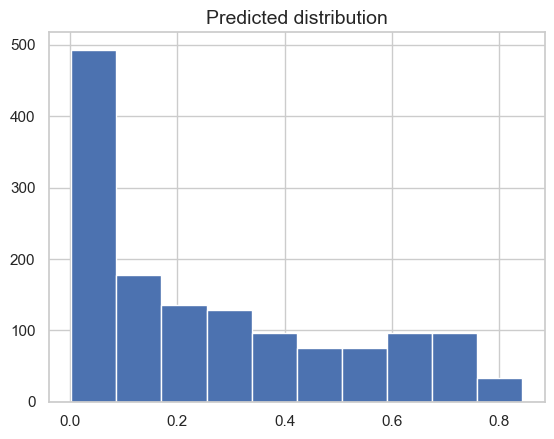

Custom Log loss score 0.41
*******************************************
Confusion matrix


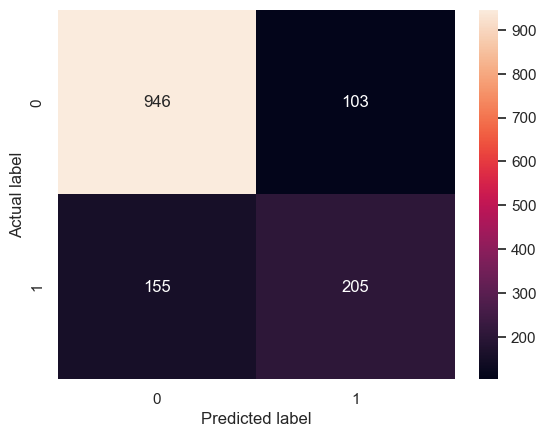

*******************************************
*********** Random Forest *************
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1049
           1       0.66      0.55      0.60       360

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409

*******************************************
Log loss score 0.4


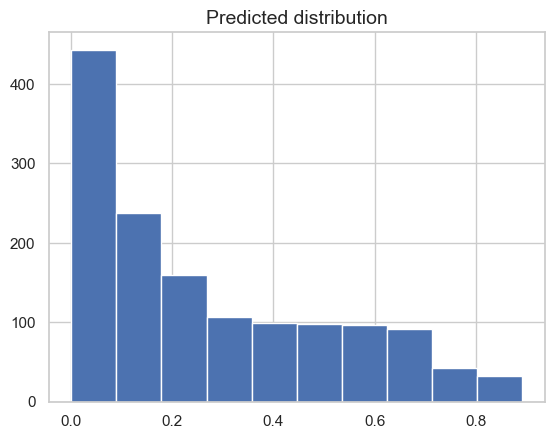

Custom Log loss score 0.4
*******************************************
Confusion matrix


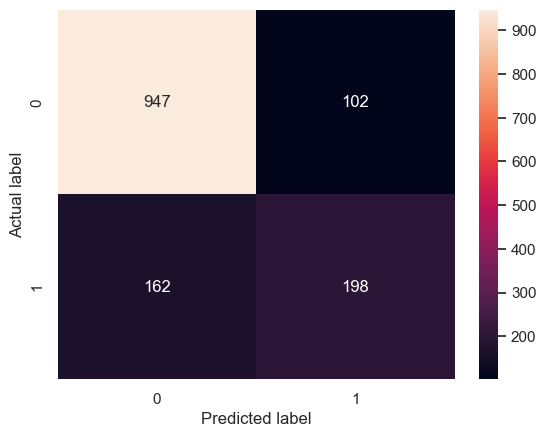

*******************************************


In [54]:
clsLR = LogisticRegression(random_state = const.random_state
                           , C = 1
                           , penalty = 'l1'
                          , solver='saga')

clsRF = RandomForestClassifier(random_state = const.random_state
                              , max_depth = 10
                              , n_estimators = 150
                              , max_features = 'sqrt'
                              , min_samples_leaf = 10 )

clsModels = [clsLR, clsRF]

Helper_function.model_evaluation(x_train, y_train, x_test, y_test, clsModels, clsModelsNm )

Text(0.5, 1.0, 'Feature importance')

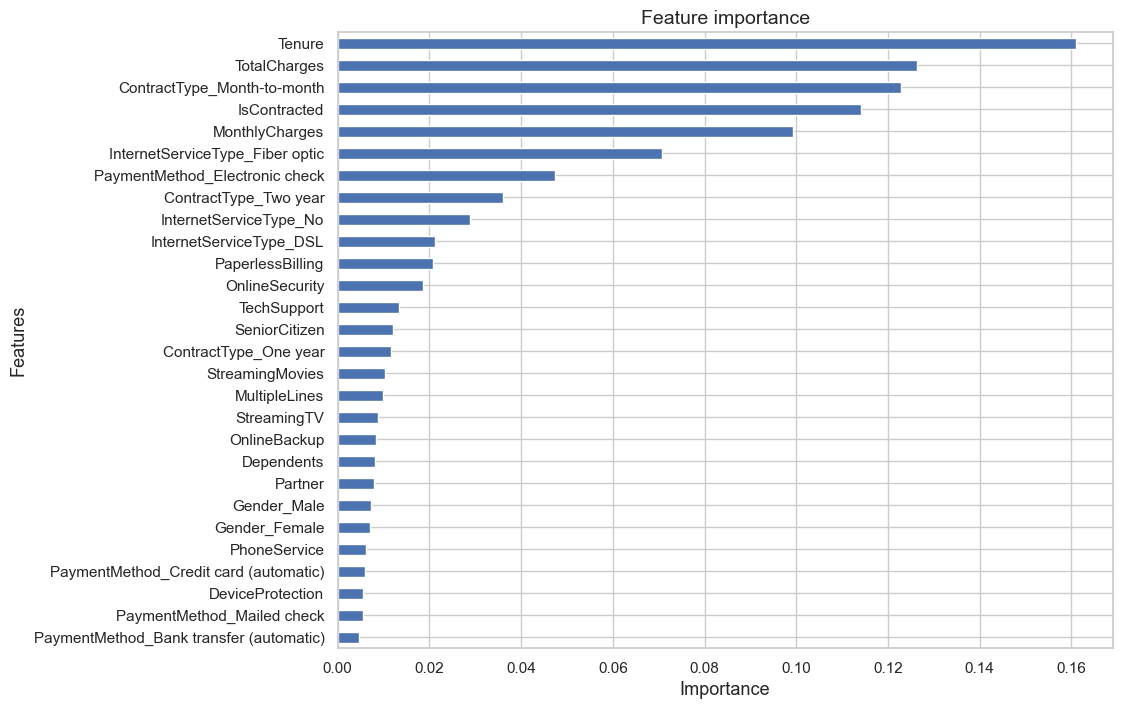

In [75]:
feature_importance = pd.Series(clsRF.feature_importances_, x_train.columns)
plt.figure(figsize = (10,8))
feature_importance.sort_values().plot(kind = 'barh')
plt.xlabel("Importance", fontsize = 13)
plt.ylabel("Features", fontsize = 13)
plt.title("Feature importance", fontsize = 14)

Based on Feature importance graph, it tells that Contract type, Payment method, Tenure, Internet sevice type, Total Charges. Monthly Charges and PaperlessBilling are some important features to predict whether customer will leave a company or not.

In [79]:

churn_customer_prob = pd.DataFrame({'Predicted_proba': clsRF.predict_proba(x_test)[:][:,1]
                                   , 'predicted': clsRF.predict(x_test)})
churn_customer_prob
     

,Predicted_proba,predicted
0,0.087406,0
1,0.339781,0
2,0.326037,0
3,0.559012,1
4,0.195133,0
...,...,...
1404,0.507924,1
1405,0.001927,0
1406,0.521351,1
1407,0.018502,0


Retention plan

Prediction on Existing Customer

Since we generated a model based on Churn and Existing customers, which help to classify both of them. Now we can use same model on existing customers to find the probability of churn.

In [83]:
existing_cust = df_model[df_model['Churn']==0]
existing_cust_feature ,existing_cust_target = Helper_function.create_model_df(df_model[df_model['Churn']==0]
                                                    , cat_cols
                                                    , nominal_cols
                                                    , binary_cols
                                                    , num_cols
                                                    , [target_col])

In [85]:

existing_customer_churn_prob = clsRF.predict_proba(existing_cust_feature)
     

existing_cust['Churn_proba'] = existing_customer_churn_prob[:][:,1]

C:\Users\Hp\AppData\Local\Temp\ipykernel_7732\2058824367.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  existing_cust['Churn_proba'] = existing_customer_churn_prob[:][:,1]


Text(0.5, 1.0, "Existing customers' Churn probability distribution")

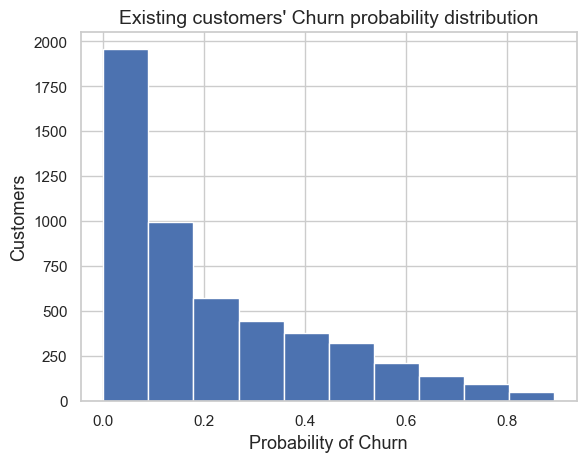

In [87]:
plt.hist(existing_cust['Churn_proba']
         , bins = 10)

plt.xlabel("Probability of Churn", fontsize=13)
plt.ylabel("Customers", fontsize=13)
plt.title("Existing customers' Churn probability distribution", fontsize=14)
     